In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from descartes import PolygonPatch

In [3]:
values = []
with open('../data/warsaw_wgs84_every_100m.txt', 'r') as f:
    for line in f:
        splitted = line.split('\t')
        try:
            splitted[2] = re.sub('\n', '', splitted[2])
            values.append(splitted)
        except IndexError as e:
            print(splitted, e)

['\n'] list index out of range


In [4]:
df = pd.DataFrame(data=values, columns=['Lon', 'Lat', 'District'])

In [5]:
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')

In [6]:
geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
#df = df.drop(['Lon', 'Lat'], axis=1)

In [9]:
crs = {'init': 'epsg:4326'}
map_gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

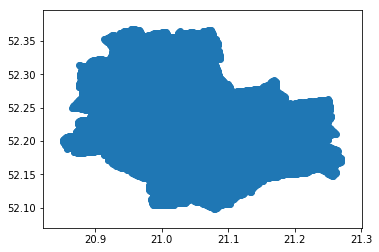

In [15]:
map_gdf.plot()

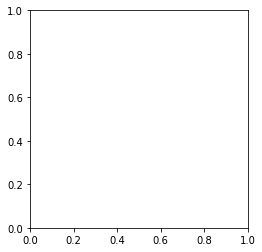

In [11]:
data_gdf = gpd.read_file('../data/data.csv')
data_gdf.crs = {'init': 'epsg:4326'}

In [12]:
data_gdf['lng'] = pd.to_numeric(data_gdf['lng'],errors='coerce')
data_gdf['lat'] = pd.to_numeric(data_gdf['lat'],errors='coerce')

In [13]:
data_gdf.geometry= [Point(xy) for xy in zip(data_gdf.lng, data_gdf.lat)]

In [18]:
data_gdf.head()

,field_1,x,y,name,vicinity,place_id,types,rating,user_ratings_total,lat,lng,type,hour,occupancy_index,occupancy_text,day,av_time_spent,min_time_spent_minutes,max_time_spent_minutes,geometry
0,0,52.108079529075006,21.008527272811,ArtDental,"Łabędzia 37/2, Piaseczno",ChIJJ6twpQMuGUcR8_z-dNLSZMg,"doctor,dentist,health",3.2,15.0,52.096356,21.011951,dentist,6,0,,Sunday,People typically spend 25 min to 1.5 hr here,25,90,POINT (21.0119505 52.0963563)
1,1,52.108079529075006,21.008527272811,ArtDental,"Łabędzia 37/2, Piaseczno",ChIJJ6twpQMuGUcR8_z-dNLSZMg,"doctor,dentist,health",3.2,15.0,52.096356,21.011951,dentist,7,0,,Sunday,People typically spend 25 min to 1.5 hr here,25,90,POINT (21.0119505 52.0963563)
2,2,52.108079529075006,21.008527272811,ArtDental,"Łabędzia 37/2, Piaseczno",ChIJJ6twpQMuGUcR8_z-dNLSZMg,"doctor,dentist,health",3.2,15.0,52.096356,21.011951,dentist,8,0,,Sunday,People typically spend 25 min to 1.5 hr here,25,90,POINT (21.0119505 52.0963563)
3,3,52.108079529075006,21.008527272811,ArtDental,"Łabędzia 37/2, Piaseczno",ChIJJ6twpQMuGUcR8_z-dNLSZMg,"doctor,dentist,health",3.2,15.0,52.096356,21.011951,dentist,9,0,,Sunday,People typically spend 25 min to 1.5 hr here,25,90,POINT (21.0119505 52.0963563)
4,4,52.108079529075006,21.008527272811,ArtDental,"Łabędzia 37/2, Piaseczno",ChIJJ6twpQMuGUcR8_z-dNLSZMg,"doctor,dentist,health",3.2,15.0,52.096356,21.011951,dentist,10,0,,Sunday,People typically spend 25 min to 1.5 hr here,25,90,POINT (21.0119505 52.0963563)


In [19]:
data_gdf['types'].unique()

array(['doctor,dentist,health', 'dentist,health', 'dentist,doctor,health',
       'doctor,dentist,veterinary_care,health',
       'spa,beauty_salon,hair_care,dentist,health',
       'beauty_salon,hair_care,doctor,dentist,health',
       'dentist,doctor,health,store', 'beauty_salon,dentist,health',
       'hospital,doctor,dentist,health', 'dentist,hospital,doctor,health',
       'dentist,physiotherapist,doctor,health',
       'physiotherapist,doctor,dentist,health,store',
       'physiotherapist,hospital,doctor,health',
       'beauty_salon,hair_care,doctor,spa,health', 'doctor,health',
       'physiotherapist,doctor,health', 'hospital,doctor,health',
       'beauty_salon,hair_care,doctor,health', 'doctor,gym,health',
       'shoe_store,doctor,health,store', 'doctor,health,store',
       'pharmacy,doctor,veterinary_care,health,store',
       'doctor,veterinary_care,health',
       'physiotherapist,doctor,health,store',
       'beauty_salon,hair_care,doctor,health,store',
       'beauty_

/home/m/.local/lib/python3.7/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


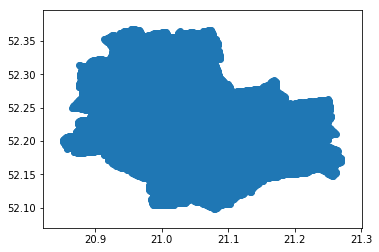

In [21]:
data_gdf.loc[data_gdf['types'].isin(['doctor'])].plot(ax=map_gdf.plot(), marker='o', color='red', markersize=5)

In [40]:
doctors = data_gdf.loc[data_gdf['types'].str.match('doctor')] 

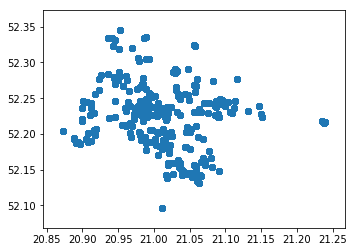

In [41]:
doctors.plot()

In [80]:
klustering = KMeans(n_clusters=10)

In [81]:
coor_doctors = gpd.GeoDataFrame(doctors, columns=('x', 'y'))

In [82]:
doctors.columns

Index(['field_1', 'x', 'y', 'name', 'vicinity', 'place_id', 'types', 'rating',
       'user_ratings_total', 'lat', 'lng', 'type', 'hour', 'occupancy_index',
       'occupancy_text', 'day', 'av_time_spent', 'min_time_spent_minutes',
       'max_time_spent_minutes', 'geometry'],
      dtype='object')

In [83]:
coor_doctors.head()

,x,y
0,52.108079529075006,21.008527272811
1,52.108079529075006,21.008527272811
2,52.108079529075006,21.008527272811
3,52.108079529075006,21.008527272811
4,52.108079529075006,21.008527272811


In [84]:
klustering.fit(coor_doctors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
doctors.plot(ax=map_gdf.plot(), c=klustering.labels_.astype(float))